In [1]:
import geopandas as gpd
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from shapely import wkt

In [2]:
df_src = pd.read_csv('Building_Violations.csv')
gdf = gpd.read_file("boundaries-zipcode.geojson")
zip_gdf = pd.read_csv("Zip_Codes.csv")
gdf

,objectid,shape_area,shape_len,zip,geometry
0,33,106052287.488,42720.0444058,60647,"MULTIPOLYGON (((-87.67762 41.91776, -87.67761 ..."
1,34,127476050.762,48103.7827213,60639,"MULTIPOLYGON (((-87.72683 41.92265, -87.72693 ..."
2,35,45069038.4783,27288.6096123,60707,"MULTIPOLYGON (((-87.78500 41.90915, -87.78531 ..."
3,36,70853834.3797,42527.9896789,60622,"MULTIPOLYGON (((-87.66707 41.88885, -87.66707 ..."
4,37,99039621.2518,47970.1401531,60651,"MULTIPOLYGON (((-87.70656 41.89555, -87.70672 ..."
...,...,...,...,...,...
56,57,155285532.005,53406.9156168,60623,"MULTIPOLYGON (((-87.69479 41.83008, -87.69486 ..."
57,58,211114779.439,58701.3253749,60629,"MULTIPOLYGON (((-87.68306 41.75786, -87.68306 ..."
58,59,211696050.967,58466.1602979,60620,"MULTIPOLYGON (((-87.62373 41.72167, -87.62388 ..."
59,60,125424284.172,52377.8545408,60637,"MULTIPOLYGON (((-87.57691 41.79511, -87.57700 ..."


In [3]:
# check first 5 rows
df_src.head()
print(zip_gdf.columns)

Index(['the_geom', 'OBJECTID', 'ZIP', 'SHAPE_AREA', 'SHAPE_LEN'], dtype='object')


In [4]:
# drop some unuseful columns
df_src=df_src.drop(columns=['VIOLATION STATUS DATE', 'LOCATION'])
# check all columns, types, and the NaN
df_src.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1880992 entries, 0 to 1880991
Data columns (total 24 columns):
 #   Column                        Non-Null Count    Dtype  
---  ------                        --------------    -----  
 0   ID                            1880992 non-null  int64  
 1   VIOLATION LAST MODIFIED DATE  1880992 non-null  object 
 2   VIOLATION DATE                1880992 non-null  object 
 3   VIOLATION CODE                1880992 non-null  object 
 4   VIOLATION STATUS              1880992 non-null  object 
 5   VIOLATION DESCRIPTION         1868011 non-null  object 
 6   VIOLATION LOCATION            898525 non-null   object 
 7   VIOLATION INSPECTOR COMMENTS  1697840 non-null  object 
 8   VIOLATION ORDINANCE           1824970 non-null  object 
 9   INSPECTOR ID                  1880992 non-null  object 
 10  INSPECTION NUMBER             1880992 non-null  int64  
 11  INSPECTION STATUS             1880976 non-null  object 
 12  INSPECTION WAIVED           

'VIOLATION STATUS DATE, VIOLATION DESCRIPTION, VIOLATION LOCATION, VIOLATION INSPECTOR COMMENTS, VIOLATION ORDINANCE, INSPECTION STATUS, STREET TYPE, SSA, LATITUDE, LONGITUDE, LOCATION' have the null values

In [5]:
## delete rows that latitude, longitude, location is null
df_nonNull = df_src[["LATITUDE", "LONGITUDE"]].notnull().all(1)
df_src = df_src[df_nonNull]
df_src

,ID,VIOLATION LAST MODIFIED DATE,VIOLATION DATE,VIOLATION CODE,VIOLATION STATUS,VIOLATION DESCRIPTION,VIOLATION LOCATION,VIOLATION INSPECTOR COMMENTS,VIOLATION ORDINANCE,INSPECTOR ID,...,DEPARTMENT BUREAU,ADDRESS,STREET NUMBER,STREET DIRECTION,STREET NAME,STREET TYPE,PROPERTY GROUP,SSA,LATITUDE,LONGITUDE
0,1218020,10/17/2006,04/26/2006,BR1001,OPEN,OWNER OR LICENSED CONTRACTOR,NaN,NaN,The code violations listed below must be corre...,551387,...,BOILER,3500 N HOYNE AVE,3500,N,HOYNE,AVE,131287,NaN,41.945098,-87.681079
1,1587577,08/22/2006,01/20/2006,CN104015,OPEN,"REPLCE WINDOW PANES, PLEXGLAS",NaN,EAST WINDOW PANES BROKEN,"Replace broken, missing or defective window pa...",BL00444,...,CONSERVATION,9129 S COMMERCIAL AVE,9129,S,COMMERCIAL,AVE,475460,5.0,41.729193,-87.551088
2,1787465,01/23/2007,12/06/2006,CN132016,COMPLIED,HEAT UNIT ADEQUATELY,NaN,INADEQUATE TEMPERATURE NO HEAT IN UNIT (3F) DU...,Heat dwelling unit adequately from September 1...,BL00951,...,CONSERVATION,1131 S MOZART ST,1131,S,MOZART,ST,257101,NaN,41.867352,-87.696999
3,1787466,12/13/2006,12/11/2006,CN104015,OPEN,"REPLCE WINDOW PANES, PLEXGLAS",NaN,BROKEN WINDOW PANES: EAST ELEVATION AND BASEMENT,"Replace broken, missing or defective window pa...",BL00875,...,CONSERVATION,6729 S ADA ST,6729,S,ADA,ST,397358,NaN,41.771401,-87.657781
4,1787467,12/31/2006,12/08/2006,CN107035,OPEN,MAINTAIN EXIT SIGN ILLUMINATED,NaN,2ND FLOOR EXIT SIGN NOT WORK,Failed to maintain all exit signs illuminated ...,BL00444,...,CONSERVATION,9138 S COMMERCIAL AVE,9138,S,COMMERCIAL,AVE,21461,5.0,41.728905,-87.551374
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1880987,6991105,06/26/2023,06/26/2023,CN190019,OPEN,ARRANGE PREMISE INSPECTION,OTHER : :OTHER,"INTERIOR OF BUILDING-NO RESPONSE,UNVERIFIED DE...",Arrange for inspection of premises. (13-12-100),BL00708,...,CONSERVATION,2310 N TRIPP AVE,2310,N,TRIPP,AVE,92447,NaN,41.922954,-87.732995
1880988,6990885,06/26/2023,06/26/2023,EV1110,OPEN,MAINTAIN OR REPAIR ELECT ELEVA,NaN,PROPERLY SERVICE % MAINTAIN #! IS OUT OF SERVICE,Failed to maintain electric elevator equipment...,371001,...,ELEVATOR,3555 S COTTAGE GROVE AVE,3555,S,COTTAGE GROVE,AVE,17694,NaN,41.829736,-87.609707
1880989,6990895,06/22/2023,06/22/2023,CN076044,OPEN,REPAIR DOWNSPOUT,EXTERIOR:E :,EAST ELEVATION - UNIT A / DOWNSPOUT / MISSING.,Failed to maintain roof downspouts in good rep...,464422,...,CONSERVATION,9622 S HALSTED ST,9622,S,HALSTED,ST,571417,NaN,41.718661,-87.643283
1880990,6990911,06/22/2023,06/22/2023,CN067024,OPEN,REPAIR EAVES,EXTERIOR:W :,WEST ELEVATION - EAVES CAPPING / BROKEN AND MI...,Failed to maintain roof eaves in good repair a...,464422,...,CONSERVATION,1620 E 75TH ST,1620,E,75TH,ST,407106,42.0,41.758889,-87.584888


In [6]:
# fill value to NaN
df_src.fillna('Unknown', inplace=True)
df_src

,ID,VIOLATION LAST MODIFIED DATE,VIOLATION DATE,VIOLATION CODE,VIOLATION STATUS,VIOLATION DESCRIPTION,VIOLATION LOCATION,VIOLATION INSPECTOR COMMENTS,VIOLATION ORDINANCE,INSPECTOR ID,...,DEPARTMENT BUREAU,ADDRESS,STREET NUMBER,STREET DIRECTION,STREET NAME,STREET TYPE,PROPERTY GROUP,SSA,LATITUDE,LONGITUDE
0,1218020,10/17/2006,04/26/2006,BR1001,OPEN,OWNER OR LICENSED CONTRACTOR,Unknown,Unknown,The code violations listed below must be corre...,551387,...,BOILER,3500 N HOYNE AVE,3500,N,HOYNE,AVE,131287,Unknown,41.945098,-87.681079
1,1587577,08/22/2006,01/20/2006,CN104015,OPEN,"REPLCE WINDOW PANES, PLEXGLAS",Unknown,EAST WINDOW PANES BROKEN,"Replace broken, missing or defective window pa...",BL00444,...,CONSERVATION,9129 S COMMERCIAL AVE,9129,S,COMMERCIAL,AVE,475460,5.0,41.729193,-87.551088
2,1787465,01/23/2007,12/06/2006,CN132016,COMPLIED,HEAT UNIT ADEQUATELY,Unknown,INADEQUATE TEMPERATURE NO HEAT IN UNIT (3F) DU...,Heat dwelling unit adequately from September 1...,BL00951,...,CONSERVATION,1131 S MOZART ST,1131,S,MOZART,ST,257101,Unknown,41.867352,-87.696999
3,1787466,12/13/2006,12/11/2006,CN104015,OPEN,"REPLCE WINDOW PANES, PLEXGLAS",Unknown,BROKEN WINDOW PANES: EAST ELEVATION AND BASEMENT,"Replace broken, missing or defective window pa...",BL00875,...,CONSERVATION,6729 S ADA ST,6729,S,ADA,ST,397358,Unknown,41.771401,-87.657781
4,1787467,12/31/2006,12/08/2006,CN107035,OPEN,MAINTAIN EXIT SIGN ILLUMINATED,Unknown,2ND FLOOR EXIT SIGN NOT WORK,Failed to maintain all exit signs illuminated ...,BL00444,...,CONSERVATION,9138 S COMMERCIAL AVE,9138,S,COMMERCIAL,AVE,21461,5.0,41.728905,-87.551374
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1880987,6991105,06/26/2023,06/26/2023,CN190019,OPEN,ARRANGE PREMISE INSPECTION,OTHER : :OTHER,"INTERIOR OF BUILDING-NO RESPONSE,UNVERIFIED DE...",Arrange for inspection of premises. (13-12-100),BL00708,...,CONSERVATION,2310 N TRIPP AVE,2310,N,TRIPP,AVE,92447,Unknown,41.922954,-87.732995
1880988,6990885,06/26/2023,06/26/2023,EV1110,OPEN,MAINTAIN OR REPAIR ELECT ELEVA,Unknown,PROPERLY SERVICE % MAINTAIN #! IS OUT OF SERVICE,Failed to maintain electric elevator equipment...,371001,...,ELEVATOR,3555 S COTTAGE GROVE AVE,3555,S,COTTAGE GROVE,AVE,17694,Unknown,41.829736,-87.609707
1880989,6990895,06/22/2023,06/22/2023,CN076044,OPEN,REPAIR DOWNSPOUT,EXTERIOR:E :,EAST ELEVATION - UNIT A / DOWNSPOUT / MISSING.,Failed to maintain roof downspouts in good rep...,464422,...,CONSERVATION,9622 S HALSTED ST,9622,S,HALSTED,ST,571417,Unknown,41.718661,-87.643283
1880990,6990911,06/22/2023,06/22/2023,CN067024,OPEN,REPAIR EAVES,EXTERIOR:W :,WEST ELEVATION - EAVES CAPPING / BROKEN AND MI...,Failed to maintain roof eaves in good repair a...,464422,...,CONSERVATION,1620 E 75TH ST,1620,E,75TH,ST,407106,42.0,41.758889,-87.584888


In [7]:
# check cleaned data
df_src.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
Index: 1879120 entries, 0 to 1880991
Data columns (total 24 columns):
 #   Column                        Non-Null Count    Dtype  
---  ------                        --------------    -----  
 0   ID                            1879120 non-null  int64  
 1   VIOLATION LAST MODIFIED DATE  1879120 non-null  object 
 2   VIOLATION DATE                1879120 non-null  object 
 3   VIOLATION CODE                1879120 non-null  object 
 4   VIOLATION STATUS              1879120 non-null  object 
 5   VIOLATION DESCRIPTION         1879120 non-null  object 
 6   VIOLATION LOCATION            1879120 non-null  object 
 7   VIOLATION INSPECTOR COMMENTS  1879120 non-null  object 
 8   VIOLATION ORDINANCE           1879120 non-null  object 
 9   INSPECTOR ID                  1879120 non-null  object 
 10  INSPECTION NUMBER             1879120 non-null  int64  
 11  INSPECTION STATUS             1879120 non-null  object 
 12  INSPECTION WAIVED             187

In [21]:
# converted 'VIOLATION DATE' type from object to datetime
df_src["VIOLATION DATE"] = pd.to_datetime(df_src["VIOLATION DATE"])
df_2023 = df_src[df_src['VIOLATION DATE'] > '2023-01-01']
df_2023

,ID,VIOLATION LAST MODIFIED DATE,VIOLATION DATE,VIOLATION CODE,VIOLATION STATUS,VIOLATION DESCRIPTION,VIOLATION LOCATION,VIOLATION INSPECTOR COMMENTS,VIOLATION ORDINANCE,INSPECTOR ID,...,DEPARTMENT BUREAU,ADDRESS,STREET NUMBER,STREET DIRECTION,STREET NAME,STREET TYPE,PROPERTY GROUP,SSA,LATITUDE,LONGITUDE
4439,6991282,06/27/2023,2023-06-27,PL151137,OPEN,OPEN,Unknown,Unknown,Unknown,290668,...,PLUMBING,4730 N ST LOUIS AVE,4730,N,ST LOUIS,AVE,177465,Unknown,41.967493,-87.715929
5707,6912372,06/27/2023,2023-02-07,EV1111,COMPLIED,MAINTAIN OR REPAIR HYDRO ELEVA,Unknown,MACHINE ROOM FIRE EXTINGUSHER,Failed to maintain hydraulic elevator equipmen...,541345,...,ELEVATOR,1357 N ELSTON AVE,1357,N,ELSTON,AVE,59589,Unknown,41.907049,-87.659765
6168,6912374,06/27/2023,2023-02-07,EV1111,COMPLIED,MAINTAIN OR REPAIR HYDRO ELEVA,Unknown,CLEAR LANDINGS,Failed to maintain hydraulic elevator equipmen...,541345,...,ELEVATOR,1357 N ELSTON AVE,1357,N,ELSTON,AVE,59589,Unknown,41.907049,-87.659765
7461,6945177,06/27/2023,2023-04-19,CN104015,COMPLIED,"REPLCE WINDOW PANES, PLEXGLAS",EXTERIOR:SW : PER PIC'S E-MAILED,1ST FLOOR/WINDOW - CRACKED PANE,"Replace broken, missing or defective window pa...",BL01000,...,CONSERVATION,2346 E 96TH ST,2346,E,96TH,ST,482855,Unknown,41.721457,-87.566138
7523,6945178,06/27/2023,2023-04-19,CN073014,COMPLIED,REPAIR EXTERIOR DOOR,EXTERIOR:SW :PER PIC'S OF E-MAIL SENT,FRONT SECURITY DOOR - CRACKED PLEXIGLASS PANE,Failed to maintain exterior door in sound cond...,BL01000,...,CONSERVATION,2346 E 96TH ST,2346,E,96TH,ST,482855,Unknown,41.721457,-87.566138
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1880987,6991105,06/26/2023,2023-06-26,CN190019,OPEN,ARRANGE PREMISE INSPECTION,OTHER : :OTHER,"INTERIOR OF BUILDING-NO RESPONSE,UNVERIFIED DE...",Arrange for inspection of premises. (13-12-100),BL00708,...,CONSERVATION,2310 N TRIPP AVE,2310,N,TRIPP,AVE,92447,Unknown,41.922954,-87.732995
1880988,6990885,06/26/2023,2023-06-26,EV1110,OPEN,MAINTAIN OR REPAIR ELECT ELEVA,Unknown,PROPERLY SERVICE % MAINTAIN #! IS OUT OF SERVICE,Failed to maintain electric elevator equipment...,371001,...,ELEVATOR,3555 S COTTAGE GROVE AVE,3555,S,COTTAGE GROVE,AVE,17694,Unknown,41.829736,-87.609707
1880989,6990895,06/22/2023,2023-06-22,CN076044,OPEN,REPAIR DOWNSPOUT,EXTERIOR:E :,EAST ELEVATION - UNIT A / DOWNSPOUT / MISSING.,Failed to maintain roof downspouts in good rep...,464422,...,CONSERVATION,9622 S HALSTED ST,9622,S,HALSTED,ST,571417,Unknown,41.718661,-87.643283
1880990,6990911,06/22/2023,2023-06-22,CN067024,OPEN,REPAIR EAVES,EXTERIOR:W :,WEST ELEVATION - EAVES CAPPING / BROKEN AND MI...,Failed to maintain roof eaves in good repair a...,464422,...,CONSERVATION,1620 E 75TH ST,1620,E,75TH,ST,407106,42.0,41.758889,-87.584888


<class 'geopandas.geodataframe.GeoDataFrame'>
Index: 36617 entries, 4439 to 1880991
Data columns (total 26 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   ID                            36617 non-null  int64         
 1   VIOLATION LAST MODIFIED DATE  36617 non-null  object        
 2   VIOLATION DATE                36617 non-null  datetime64[ns]
 3   VIOLATION CODE                36617 non-null  object        
 4   VIOLATION STATUS              36617 non-null  object        
 5   VIOLATION DESCRIPTION         36617 non-null  object        
 6   VIOLATION LOCATION            36617 non-null  object        
 7   VIOLATION INSPECTOR COMMENTS  36617 non-null  object        
 8   VIOLATION ORDINANCE           36617 non-null  object        
 9   INSPECTOR ID                  36617 non-null  object        
 10  INSPECTION NUMBER             36617 non-null  int64         
 11  INSPECTION STATUS   

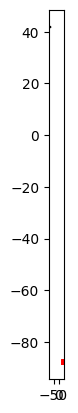

In [23]:
#-----!!!!!!!!!!!!!!  It is a failed attempt  !!!!!!!!!!!!!!-----#
#-----!!!!!!!!!!!!!!  It still here just because I think it also is a interesting attempt  !!!!!!!!!!!!!!-----#

# I try to add the 'zipcode' attribute to the building violation dataset by using the 'location' attribute
# I think to use the location(latitude, longitude) to check the geometry zipcode with the Chicago boundary CSV file for creating the Heat map
# But unfortunately, it seems like our building violation used a different encoding method, which caused the mismatch of two datasets
# Because I try to visualize a subset of data by using matplotlib to check the overlap. It is nothing
# So my zip only can get 0
# So I try to use the location as each dot and show it on the Chicago map.

df_zip = df_2023

geometry = gpd.points_from_xy(df_zip["LATITUDE"], df_zip["LONGITUDE"])
c_gdf = gpd.GeoDataFrame(df_zip, crs="EPSG:4326", geometry=geometry)
c_gdf.set_crs(gdf.crs, inplace=True)

gdf_joined = gpd.sjoin(c_gdf, gdf[['geometry', 'zip']], how="left", predicate="within")
gdf_joined.drop(columns=['index_right'], inplace=True) 
gdf_joined.info(verbose=True, show_counts=True)

base = gdf.plot(color='white', edgecolor='black')
c_gdf.plot(ax=base, marker='o', color='red', markersize=5)
plt.show()

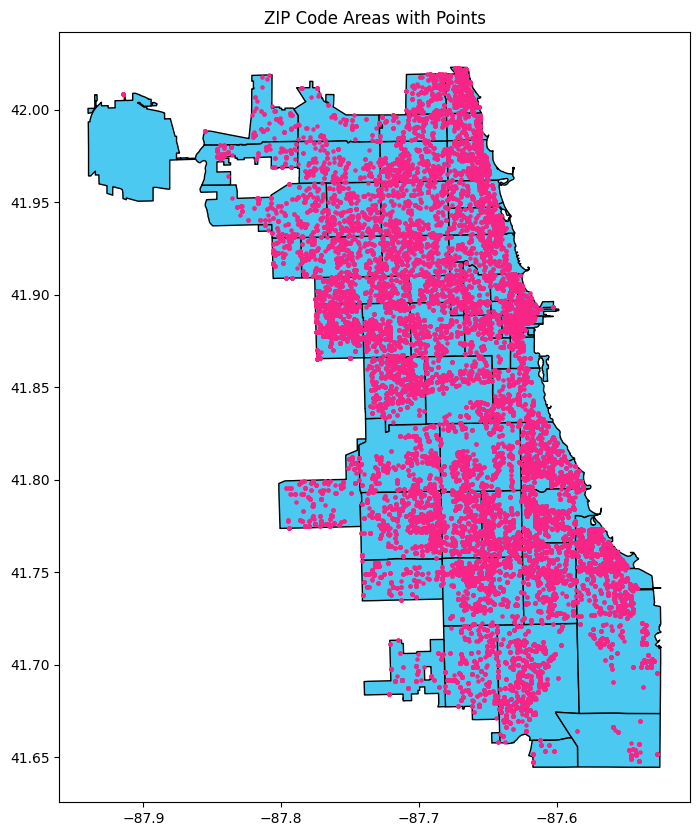

In [29]:
# Building violation distribution in the Chicago
base = gdf.plot(edgecolor='black', color='#4cc9f0',figsize=(10, 10))

base.scatter(df_zip['LONGITUDE'], df_zip['LATITUDE'], color='#f72585', s=5)

plt.title('ZIP Code Areas with Points')

plt.show()